<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

In [3]:
# resumen de la informacion

def resumen_por_columna(df,cols):
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [4]:
#Primera verificación de los elementos de species
conteo = resumen_por_columna(df,'species')
conteo

,columna,unicos,vacios
0,species,11,1


In [10]:
#Correción de los datos
df['species'] = df['species'].str.lower() #Se deja todo en minuscula
df['species'] = df['species'].str.strip() #Se eliminan los espacios en blanco
df.loc[df['species'].isnull(),'species'] = 'default' #Los valores nan pasana default
conteo = resumen_por_columna(df,'species') #Nueva verificación
conteo

,columna,unicos,vacios
0,species,4,0


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

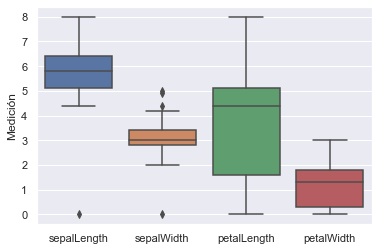

In [6]:
#Todos los nan por columna los cambia a 0
#df.loc[df['species']=='default','species'] = '0'
df.loc[df['sepalLength'].isnull(),'sepalLength'] = 0
df.loc[df['sepalWidth'].isnull(),'sepalWidth'] = 0
df.loc[df['petalLength'].isnull(),'petalLength'] = 0
df.loc[df['petalWidth'].isnull(),'petalWidth'] = 0

#Creación del gráfico

# Definición de dataframe con solo las columnas de interés
lenwid_df = df.drop(['species'], axis=1)
 
# Creación del Box-Plot
sns.set(font_scale = 1) #incremento del tamaño de letras
sns.boxplot(data=lenwid_df).set(ylabel='Medición')

plt.show()

#df.boxplot(column=['sepalLength','sepalWidth', 'petalLength', 'petalWidth'])
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [7]:
#Establecer las condiciones
sl = (df['sepalLength']>=4.0) & (df['sepalLength']<=7.0)
sw = (df['sepalWidth']>=2.0) & (df['sepalWidth']<=4.5)
pl = (df['petalLength']>=1.0) & (df['petalLength']<=7.0)
pw = (df['petalWidth']>=0.1) & (df['petalWidth']<=2.5)
#Se genera una lista que contiene True si se cumplen todas las limitantes y False en caso contrario
filtro = sl & sw & pl & pw
df_filtrado = df.copy() #Creación de una copia para no sobre escribir el dataframe original
df_filtrado.insert(5, "label", filtro, True) #Se inserta la columna label con el filtro creado anteriormente
df_filtrado

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

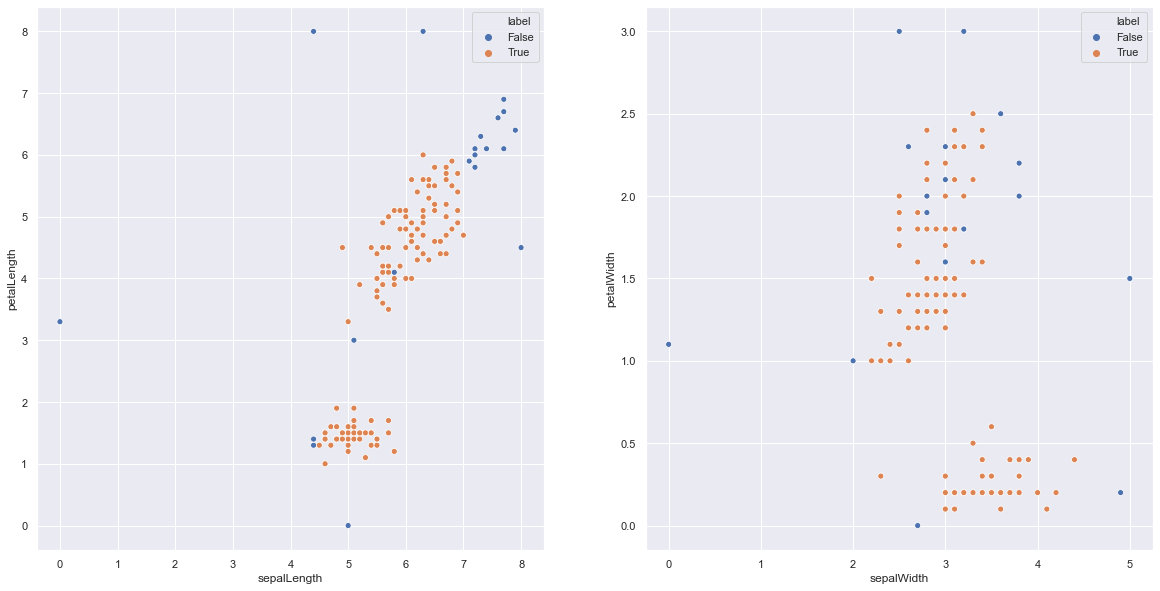

In [8]:
#Creación de gráficos con subplot y usando sns
plt.figure(figsize= (20,10))
g1 = plt.subplot(1,2,1)
g2 = plt.subplot(1,2,2)
sns.scatterplot(
    x='sepalLength',
    y='petalLength',
    hue='label',
    data=df_filtrado,
    ax=g1
)
sns.scatterplot(
    x='sepalWidth',
    y='petalWidth',
    hue='label',
    data=df_filtrado,
    ax=g2
)
plt.show()

En el primer gráfico se puede apreciar que los valores que cumplen las condiciones de los limitantes estan relativamente
juntos, mientras que los demas datos estan notoriamente dispersos a lo largo del gráfico

En el segundo caso notamos que los datos no estan sobrepuestos y estan muy "parejos" unos de otros, además que se sigue manteniendo la relación entre los valores True y False del gráfico anterior

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

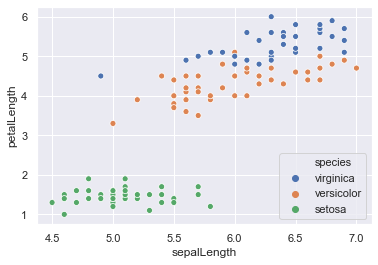

In [9]:
df_filtrado = df_filtrado.drop(df_filtrado[df_filtrado.label== False].index) #Eliminamos los False
df_filtrado = df_filtrado.drop(df_filtrado[df_filtrado.species=='default'].index) #Se elimiman las filas con default
newData = pd.DataFrame(df_filtrado.loc[df_filtrado["label"] == True]) #Se filtra solo aquellos datos que cumple con True en la columna label
sns.scatterplot(
    x='sepalLength',
    y='petalLength',
    hue='species',
    data=newData
)
plt.show()